### Import Liblary

In [58]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

## Regresi Sederhana pada DNN

In [59]:
x = np.array([1,2,3,4,5,6], dtype=float)
y = np.array([2,4,6,8,10,12], dtype=float)

In [60]:
model = Sequential()
model.add(Dense(1, input_shape=[1]))

In [61]:
model.compile(optimizer='sgd', loss='mse')

In [62]:
# menggunakan parameter jika nilai yang di dapat sdh di tentukan maka epoch berhenti 

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if (logs.get('loss') < 1e-4):
            self.model.stop_training = True
cb = myCallback()

## latih Model nya

In [63]:
# semkain tinggi epoch semakin tinggi nilai nya 
model.fit (x,y, epochs=2000, callbacks=cb)

Epoch 1/2000
1/1 [==============================] - 0s 493ms/step - loss: 2.4666
Epoch 2/2000
1/1 [==============================] - 0s 2ms/step - loss: 1.1424
Epoch 3/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.5296
Epoch 4/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.2459
Epoch 5/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.1146
Epoch 6/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0538
Epoch 7/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0257
Epoch 8/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0127
Epoch 9/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0066
Epoch 10/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0038
Epoch 11/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0025
Epoch 12/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0019
Epoch 13/2000
1/1 [============================

## Prediksi Data Baru 

In [64]:
# epoch 1000 + callbacks
newData = np.array([6.0,7.0,8.0])

y_pred = model.predict(newData)
print(y_pred)

1/1 [==============================] - 0s 34ms/step
[[11.990896]
 [13.9856  ]
 [15.980304]]


## Klasifikasi dengan Dataset MNIST

In [65]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [66]:
(x_train_raw, y_train_raw ),(x_test_raw, y_test_raw ) = tf.keras.datasets.mnist.load_data()

### * Encoding Label pada Gambar

In [67]:
num_class = 10

# ONE-HOT ENCODING 
y_train = keras.utils.to_categorical(y_train_raw, num_class)
y_test  = keras.utils.to_categorical(y_test_raw, num_class)

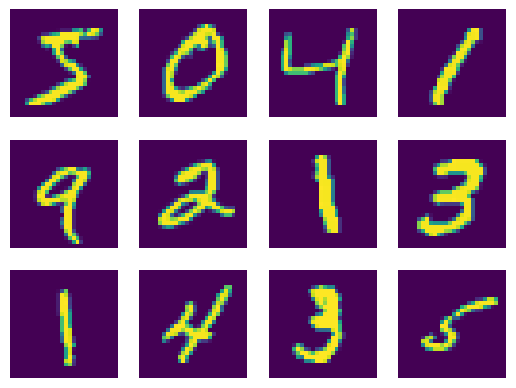

In [68]:
for i in range(12):
    plt.subplot(3,4,i+1)
    plt.imshow(x_train_raw[i])
    plt.axis('off')
plt.show()

In [69]:
x_train_raw.shape
# 28, 28 jumlah piksel
# 60000 jumlah data

(60000, 28, 28)

In [70]:
y_train_raw.shape

(60000,)

In [71]:
# Konversi 28x28 jadi sebuah vektor berukuran 784x1

x_train = x_train_raw.reshape(60000,784)
x_test = x_test_raw.reshape(10000, 784)


In [72]:
# Normalisasi piksel pada Gambar

# 255 Total nilai RGB
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

## Membuat DNN (Deep Neural Network)
#### Terdiri dari 3 layers dan 2 aktivasi RELU

In [73]:
model = Sequential(
    [
        Dense(512, activation='relu', input_dim = 784),
        Dense(256, activation='relu'),
        Dense(128, activation='relu'),
        Dense(10,  activation='softmax')
    ]
)

In [74]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 512)               401920    
                                                                 
 dense_10 (Dense)            (None, 256)               131328    
                                                                 
 dense_11 (Dense)            (None, 128)               32896     
                                                                 
 dense_12 (Dense)            (None, 10)                1290      
                                                                 
Total params: 567,434
Trainable params: 567,434
Non-trainable params: 0
_________________________________________________________________


### Optimalisasi model 

In [75]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#jika cuma 2 shape atau 2 perbandingan seperti anjing dan kucing maka loss nya menggunakan binary_crossentropy


### Fitting training Model

In [78]:
model.fit(x_train, y_train, batch_size=32, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0619 - accuracy: 0.9810
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0323 - accuracy: 0.9898
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0273 - accuracy: 0.9910
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0256 - accuracy: 0.9923
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0220 - accuracy: 0.9934
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0195 - accuracy: 0.9940
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0195 - accuracy: 0.9940
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0175 - accuracy: 0.9951
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0183 - accuracy: 0.9948
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.016

### Evaluasi model yang telas di train 

In [79]:
# BATCH_SIZE = 32
score = model.evaluate(x_test, y_test)
print("TEST LOSS     : ", score[0])
print("TEST ACCURACY : ", score[1])

313/313 [==============================] - 0s 1ms/step - loss: 0.1247 - accuracy: 0.9777
TEST LOSS     :  0.12474387139081955
TEST ACCURACY :  0.9776999950408936


In [80]:
model.fit(x_train, y_train, batch_size=128, epochs=10)

Epoch 1/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0048 - accuracy: 0.9986
Epoch 2/10
469/469 [==============================] - 2s 4ms/step - loss: 6.0438e-04 - accuracy: 0.9999
Epoch 3/10
469/469 [==============================] - 2s 4ms/step - loss: 1.4590e-04 - accuracy: 1.0000
Epoch 4/10
469/469 [==============================] - 2s 4ms/step - loss: 7.1307e-05 - accuracy: 1.0000
Epoch 5/10
469/469 [==============================] - 2s 4ms/step - loss: 4.5135e-05 - accuracy: 1.0000
Epoch 6/10
469/469 [==============================] - 2s 4ms/step - loss: 2.9516e-05 - accuracy: 1.0000
Epoch 7/10
469/469 [==============================] - 2s 4ms/step - loss: 1.9969e-05 - accuracy: 1.0000
Epoch 8/10
469/469 [==============================] - 2s 4ms/step - loss: 1.3298e-05 - accuracy: 1.0000
Epoch 9/10
469/469 [==============================] - 2s 4ms/step - loss: 8.9110e-06 - accuracy: 1.0000
Epoch 10/10
469/469 [==============================] - 2s 4ms/step -

In [81]:
# BATCH_SIZE = 128
score2 = model.evaluate(x_test, y_test)
print("TEST LOSS     : ", score2[0])
print("TEST ACCURACY : ", score2[1])

313/313 [==============================] - 0s 1ms/step - loss: 0.1165 - accuracy: 0.9857
TEST LOSS     :  0.11649435758590698
TEST ACCURACY :  0.9857000112533569
